In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [2]:
df = pd.read_csv("franchises_complete_dataframe.csv", index_col = 0)

D:\Programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,7,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


When considering comparisons of franchise vs non-franchise, it makes sense to get a clear picture of th data first:

In [3]:
df

,franchise_name,franchise_id,tconst,title,year,is_adult,runtime,genres,rating,votes,type,game_id,best_fit_ratio,developers,platforms,publishers,age_rating,franchise_count
0,Coffin Joe,f1,tt0060380,esta noite encarnarei no teu cadáver,1967,0,108,['Horror'],7.0,1952.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,10.0
1,Coffin' Joe,f822,tt0060380,esta noite encarnarei no teu cadáver,1967,0,108,['Horror'],7.0,1952.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,Coffin Joe,f1,tt0062943,the strange world of coffin joe,1968,0,80,['Horror'],6.3,653.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,10.0
3,Coffin Joe,f1,tt0062690,awakening of the beast,1970,0,93,"['Drama,Horror']",5.8,1208.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4,Coffin Joe,f1,tt0071479,exorcismo negro,1974,0,100,['Horror'],6.0,274.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16985,NaN,NaN,tt9888864,Infernal,2007,0,NaN,['Action'],6.0,17.0,game,NaN,90.0,NaN,NaN,NaN,NaN,NaN
16986,NaN,NaN,tt9892552,Spiral Splatter,2017,0,NaN,['Action'],2.0,10.0,game,NaN,85.5,NaN,NaN,NaN,NaN,NaN
16987,NaN,NaN,tt9893348,Alien: Covenant In Utero VR Experience,2017,0,NaN,['Sci-Fi'],6.2,17.0,game,NaN,90.0,NaN,NaN,NaN,NaN,NaN
16988,LEGO,3025-448,tt9893804,The Lego Movie 2 Videogame,2019,0,NaN,"['Animation', 'Adventure', 'Family', 'Action-A...",5.5,156.0,game,22035.0,100.0,['TT Games'],"['PC', 'Xbox One', 'PlayStation 4', 'Nintendo ...",['WB Games'],NaN,56.0


We want the number of unique tconsts as this ensures we're not counting the same release twice

In [4]:
df.tconst.nunique()

304527

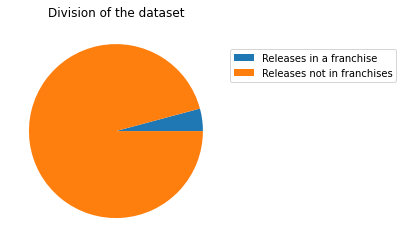

In [5]:
pie = plt.pie([df[~df["franchise_id"].isna()].tconst.nunique(), df[df["franchise_id"].isna()].tconst.nunique()])
plt.legend(pie[0], ["Releases in a franchise", "Releases not in franchises"], bbox_to_anchor=(1,0.9))
plt.title("Division of the dataset")
plt.show()

Another way to look at this would be considering movies and games as well

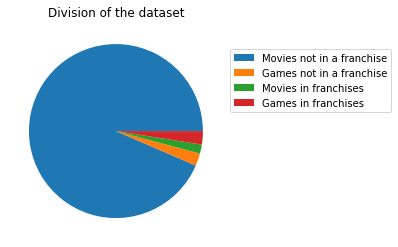

In [6]:
pie = plt.pie([df[(df["franchise_id"].isna()) & (df["type"]=="movie")].tconst.nunique(),
               df[(df["franchise_id"].isna()) & (df["type"]=="game")].tconst.nunique(),
               df[(~df["franchise_id"].isna()) & (df["type"]=="movie")].tconst.nunique(),
               df[(~df["franchise_id"].isna()) & (df["type"]=="game")].tconst.nunique()
              ])
plt.legend(pie[0], ["Movies not in a franchise", "Games not in a franchise", "Movies in franchises", "Games in franchises"], bbox_to_anchor=(1,0.9))
plt.title("Division of the dataset")
plt.show()

In [7]:
print("Average non-franchised movie votes: {}\nAverage franchised movie votes: {}\nAverage non-franchised game votes: {}\nAverage franchised game votes: {}\n".format(   
df[(df["franchise_id"].isna()) & (df["type"]=="movie")].tconst.nunique(),
df[(~df["franchise_id"].isna()) & (df["type"]=="movie")].tconst.nunique(),
df[(df["franchise_id"].isna()) & (df["type"]=="game")].tconst.nunique(),
df[(~df["franchise_id"].isna()) & (df["type"]=="game")].tconst.nunique()))

Average non-franchised movie votes: 285010
Average franchised movie votes: 5144
Average non-franchised game votes: 7102
Average franchised game votes: 7566



We can get the average vote and rating for each subsection of our data:

In [8]:
table_dict = {"Movies (No Franchise)": df[(df["franchise_id"].isna()) & (df["type"]=="movie")].votes.describe(), \
              "Movies (Franchise)": df[(~df["franchise_id"].isna()) & (df["type"]=="movie")].votes.describe(), \
              "Games (No Franchise)": df[(df["franchise_id"].isna()) & (df["type"]=="game")].votes.describe(), \
              "Games (Franchise)": df[(~df["franchise_id"].isna()) & (df["type"]=="game")].votes.describe()}

table = pd.concat(table_dict, axis=1)

print(table)

       Movies (No Franchise)  Movies (Franchise)  Games (No Franchise)  \
count           2.850130e+05        5.320000e+03           7122.000000   
mean            2.826620e+03        5.028693e+04            141.077506   
std             2.821814e+04        1.679721e+05            726.286436   
min             5.000000e+00        5.000000e+00              5.000000   
25%             1.800000e+01        1.270000e+02             11.000000   
50%             5.800000e+01        7.920000e+02             21.000000   
75%             2.920000e+02        8.711250e+03             55.750000   
max             2.727553e+06        2.700528e+06          24108.000000   

       Games (Franchise)  
count        9865.000000  
mean          587.798784  
std          2364.846129  
min             5.000000  
25%            23.000000  
50%            68.000000  
75%           271.000000  
max         69750.000000  


## Are more new small franchises appearing?

In [ ]:
df2 = df.sort_values('year').groupby('franchise_id').agg({
    'franchise_name' : 'first',
    'type': 'first',
    'rating': 'mean',
    'votes': 'mean',
    'franchise_count': 'first',
    'year': ['first', 'last']
})

In [ ]:
plot timeline. each franchise gets line from start year to end year.

In [ ]:
Create dictionary with total for each year, grouped by type

D:\Programs\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

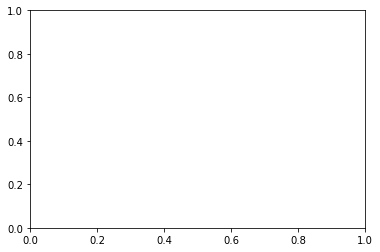

In [25]:
fig, ax = plt.subplots()
ax.stackplot(df.year, df.groupby('year')['type']value_counts(),
             alpha=0.)
plt.show()

We have 5320 franchised movies, so let's get a sample of that number of non-franchised movies to compare them:

In [17]:
df_movie_sample = df[df['type'] == 'movie'].sample(n=5320)

We can have a look at the stats for our sample and confirm that the sample is a fair representation of our original data

In [19]:
df_movie_sample.votes.describe()

count    5.320000e+03
mean     3.922228e+03
std      3.921499e+04
min      5.000000e+00
25%      1.800000e+01
50%      5.900000e+01
75%      2.832500e+02
max      1.337698e+06
Name: votes, dtype: float64